Dataset “blood.xlsx” (X1 = систолическое давление (зависимая переменная), X2 = возраст пациента в годах, X3 = вес в фунтах (две независимые переменные)): 

Постройте модель ридж регрессии для X1 как функции от X2 и  X3. Используйте функции cv.plot и bias.plot для нахождения параметра k. 

Проверьте мультиколлинеарность данных. 

Проверьте значимость построенного уравнения регрессии. 

Проведите сравнительной анализ полученной модели с моделью линейной регрессии (когда оценки найдены по МНК). 

Dataset “Kuiper.xls” (price – зависимая переменная, mileage, liter, cruise, sound, leather – независимые переменные): 

Постройте квантильную регрессию для различных значений параметров «тау», Y = price – зависимая переменная, mileage, liter, cruise, sound, leather leather – независимые переменные). 

Изобразите результаты на графиках. 

Постройте модель линейной регрессии и сравните эту модель с моделью медианной регрессии. 

Dataset “cigarettes.txt”: (переменные по столбцам: carbon monoxide, tar, nicotine, weight): 

Постройте несколько моделей нелинейной (квадратичной и кубической) регрессии с зависимой переменной y=carbon monoxide, и независимыми переменными:  x1=tar, x2=nicotine, x3=weight.  

Постройте модель линейной регрессии и сравните эту модель с моделями нелинейной регрессии. 

 

1. Dataset “blood.xlsx”

In [2]:
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import numpy as np

In [3]:
blood_data = pd.read_excel('Datasets/blood.xlsx')
X = blood_data[['X2', 'X3']] 
y = blood_data['X1']
blood_data

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


In [4]:
X_with_const = sm.add_constant(X) 

Построение ридж-регрессии

In [6]:
alphas = np.logspace(-6, 6, 100)
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True).fit(X, y)
print(f"Лучший параметр регуляризации k: {ridge_model.alpha_}")
print("Коэффициенты ридж-регрессии:", ridge_model.coef_)
print(f"R^2 для ридж-регрессии: {ridge_model.score(X, y):.4f}")

Лучший параметр регуляризации k: 43.287612810830616
Коэффициенты ридж-регрессии: [0.64755353 0.43507973]
R^2 для ридж-регрессии: 0.9746


C:\Users\Евгений\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


 Проверка мультиколлинеарности с помощью VIF

In [7]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
vif_data

,feature,VIF
0,const,291.991582
1,X2,9.525022
2,X3,9.525022


Проверка значимости модели ридж-регрессии

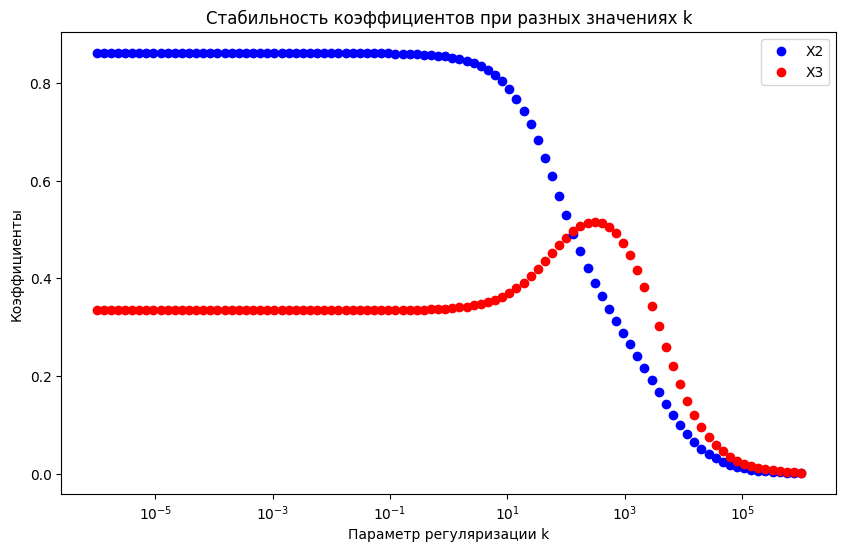

In [8]:
plt.figure(figsize=(10, 6))
for alpha in alphas:
    ridge = RidgeCV(alphas=[alpha]).fit(X, y)
    plt.plot(alpha, ridge.coef_[0], 'bo', label='X2' if alpha == alphas[0] else "")
    plt.plot(alpha, ridge.coef_[1], 'ro', label='X3' if alpha == alphas[0] else "")

plt.xscale('log')
plt.xlabel('Параметр регуляризации k')
plt.ylabel('Коэффициенты')
plt.title('Стабильность коэффициентов при разных значениях k')
plt.legend()
plt.show()

Сравнительный анализ с линейной регрессией

In [9]:
linear_model = LinearRegression().fit(X, y)
print("Коэффициенты линейной регрессии:", linear_model.coef_)
print(f"R^2 для линейной регрессии: {linear_model.score(X, y):.4f}")

Коэффициенты линейной регрессии: [0.86141469 0.3348592 ]
R^2 для линейной регрессии: 0.9768


2. Dataset “Kuiper.xls”

In [10]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
kuiper_data = pd.read_excel('Datasets/kuiper.xls')
X = kuiper_data[['Mileage', 'Liter', 'Cruise', 'Sound', 'Leather']]
y = kuiper_data['Price']
kuiper_data

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [15]:
X.loc[:, ['Cruise', 'Sound', 'Leather']] = X[['Cruise', 'Sound', 'Leather']].astype('category')
scaler = StandardScaler()
X.loc[:, ['Mileage', 'Liter']] = scaler.fit_transform(X[['Mileage', 'Liter']])
X_sm = sm.add_constant(X)

Квантильная регрессия для различных значений τ

In [26]:
coefficients_quantile = {var: [] for var in X_sm.columns}
taus = [0.1, 0.2, 0.5, 0.9] 
for tau in taus:
    quantile_model = sm.QuantReg(y, X_sm).fit(q=tau)
    print(f'Квантильная регрессия для τ = {tau}')
    print(quantile_model.summary())
    print('\n')


Квантильная регрессия для τ = 0.1
                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.3497
Model:                       QuantReg   Bandwidth:                       3638.
Method:                 Least Squares   Sparsity:                    1.014e+04
Date:                Wed, 20 Nov 2024   No. Observations:                  804
Time:                        19:05:21   Df Residuals:                      798
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.427e+04    333.173     42.820      0.000    1.36e+04    1.49e+04
Mileage     -912.6957    108.364     -8.423      0.000   -1125.407    -699.984
Liter       3647.3010    102.239     35.674      0.000    3446.612    3847.990
Cruise       455.3

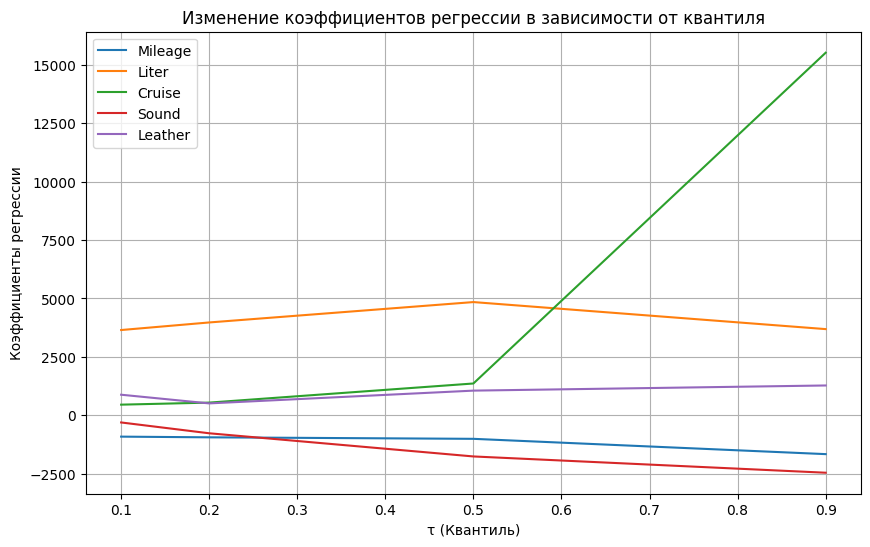

In [30]:
coefficients = {var: [] for var in X_sm.columns}

# Вычисление коэффициентов для каждого квантиля
for tau in taus:
    quantile_model = sm.QuantReg(y, X_sm).fit(q=tau)
    for var, coef in zip(X_sm.columns, quantile_model.params):
        coefficients[var].append(coef)

# Построение графиков изменения коэффициентов
plt.figure(figsize=(10, 6))

for var in coefficients:
    if var != 'const':
        plt.plot(taus, coefficients[var], label=var)

plt.xlabel('τ (Квантиль)')
plt.ylabel('Коэффициенты регрессии')
plt.title('Изменение коэффициентов регрессии в зависимости от квантиля')
plt.legend()
plt.grid(True)
plt.show()


Линейная регрессия для сравнения

In [31]:
print('Линейная регрессия')
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

Линейная регрессия
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           7.24e-91
Time:                        19:09:07   Log-Likelihood:                -8319.6
No. Observations:                 804   AIC:                         1.665e+04
Df Residuals:                     798   BIC:                         1.668e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.56e+04    831.178 

медианнанная регрессии

In [34]:
median_model = sm.QuantReg(y, X_sm).fit(q=0.5)
print("Медианная регрессия")
print(median_model.summary())


Медианная регрессия
                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.2688
Model:                       QuantReg   Bandwidth:                       3283.
Method:                 Least Squares   Sparsity:                        9490.
Date:                Wed, 20 Nov 2024   No. Observations:                  804
Time:                        19:20:07   Df Residuals:                      798
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.755e+04    520.681     33.701      0.000    1.65e+04    1.86e+04
Mileage    -1006.6506    167.530     -6.009      0.000   -1335.501    -677.800
Liter       4843.3543    182.466     26.544      0.000    4485.185    5201.524
Cruise      1360.7803    422.254

3. Dataset “cigarettes.txt”

In [ ]:
import pandas as pd
import statsmodels.api as sm

In [38]:
cigarettes_data = pd.read_csv('Datasets/cigarettes.dat.txt', delimiter='\\s+', header=None)
cigarettes_data.columns = ['name', 'carbon_monoxide', 'tar', 'nicotine', 'weight']
X_base = cigarettes_data[['tar', 'nicotine', 'weight']]
y = cigarettes_data['carbon_monoxide']


Квадратичная регрессия

In [40]:
X_quad = X_base.copy()
X_quad['tar_sq'] = X_quad['tar']**2
quadratic_model = sm.OLS(y, sm.add_constant(X_quad)).fit()
print(quadratic_model.summary())
print("AIC:", quadratic_model.aic, end='\n\n\n')

                            OLS Regression Results                            
Dep. Variable:        carbon_monoxide   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     211.2
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           4.71e-16
Time:                        19:32:12   Log-Likelihood:                -31.239
No. Observations:                  25   AIC:                             72.48
Df Residuals:                      20   BIC:                             78.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0459      2.385     -0.438      0.6

Кубическая регрессия

In [41]:
X_cubic = X_quad.copy()
X_cubic['tar_cu'] = X_cubic['tar']**3
cubic_model = sm.OLS(y, sm.add_constant(X_cubic)).fit()
print(cubic_model.summary())
print("AIC:", cubic_model.aic, end='\n\n\n')


                            OLS Regression Results                            
Dep. Variable:        carbon_monoxide   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     160.5
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           7.38e-15
Time:                        19:33:30   Log-Likelihood:                -31.239
No. Observations:                  25   AIC:                             74.48
Df Residuals:                      19   BIC:                             81.79
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0457      2.447     -0.427      0.6

Линейная регрессия

In [42]:
linear_model = sm.OLS(y, sm.add_constant(X_base)).fit()
print(linear_model.summary())
print("AIC:", linear_model.aic)


                            OLS Regression Results                            
Dep. Variable:        carbon_monoxide   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           9.95e-17
Time:                        19:34:16   Log-Likelihood:                -32.889
No. Observations:                  25   AIC:                             73.78
Df Residuals:                      21   BIC:                             78.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3696      2.347     -1.010      0.3